In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

menu_items=pd.read_csv(r'C:\Users\USER\Downloads\Restaurant DA/menu_items.csv')
order_details=pd.read_csv(r'C:\Users\USER\Downloads\Restaurant DA/order_details.csv')

In [62]:
menu_items.rename(columns={'menu_item_id':'item_id'}, inplace=True)
menu_items.head()

,item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00


In [63]:
order_details.head()

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,1/1/23,11:38:36 AM,109.0
1,2,2,1/1/23,11:57:40 AM,108.0
2,3,2,1/1/23,11:57:40 AM,124.0
3,4,2,1/1/23,11:57:40 AM,117.0
4,5,2,1/1/23,11:57:40 AM,129.0


In [64]:
restr_df=pd.merge(menu_items, order_details, on='item_id', how='inner')
restr_df.head()

,item_id,item_name,category,price,order_details_id,order_id,order_date,order_time
0,101,Hamburger,American,12.95,11,6,1/1/23,12:29:36 PM
1,101,Hamburger,American,12.95,26,11,1/1/23,1:02:59 PM
2,101,Hamburger,American,12.95,43,17,1/1/23,1:53:00 PM
3,101,Hamburger,American,12.95,63,24,1/1/23,2:23:01 PM
4,101,Hamburger,American,12.95,71,27,1/1/23,3:11:17 PM


In [65]:
restr_df.to_csv(r'C:\Users\USER\Downloads\Restaurant DA\merged_restr_file.csv')

In [66]:
restr_df=pd.read_csv(r'C:\Users\USER\Downloads\Restaurant DA/merged_restr_file.csv')
restr_df.head(10)

,Unnamed: 0,item_id,item_name,category,price,order_details_id,order_id,order_date,order_time
0,0,101,Hamburger,American,12.95,11,6,1/1/23,12:29:36 PM
1,1,101,Hamburger,American,12.95,26,11,1/1/23,1:02:59 PM
2,2,101,Hamburger,American,12.95,43,17,1/1/23,1:53:00 PM
3,3,101,Hamburger,American,12.95,63,24,1/1/23,2:23:01 PM
4,4,101,Hamburger,American,12.95,71,27,1/1/23,3:11:17 PM
5,5,101,Hamburger,American,12.95,83,33,1/1/23,3:54:08 PM
6,6,101,Hamburger,American,12.95,90,36,1/1/23,4:54:09 PM
7,7,101,Hamburger,American,12.95,123,51,1/1/23,6:48:28 PM
8,8,101,Hamburger,American,12.95,145,61,1/1/23,8:08:43 PM
9,9,101,Hamburger,American,12.95,147,62,1/1/23,8:50:16 PM


In [67]:
#drop unnamed column
restr_df.drop(columns=['Unnamed: 0'], inplace=True)

In [68]:
#search df for missing data
restr_df.isnull().sum()

item_id             0
item_name           0
category            0
price               0
order_details_id    0
order_id            0
order_date          0
order_time          0
dtype: int64

In [69]:
#drop duplicates
restr_df.drop_duplicates().tail()

,item_id,item_name,category,price,order_details_id,order_id,order_date,order_time
12092,132,Eggplant Parmesan,Italian,16.95,12120,5322,3/31/23,1:35:58 PM
12093,132,Eggplant Parmesan,Italian,16.95,12126,5326,3/31/23,1:50:17 PM
12094,132,Eggplant Parmesan,Italian,16.95,12149,5334,3/31/23,3:29:36 PM
12095,132,Eggplant Parmesan,Italian,16.95,12169,5344,3/31/23,5:22:40 PM
12096,132,Eggplant Parmesan,Italian,16.95,12194,5355,3/31/23,6:51:00 PM


In [70]:
restr_df.dtypes

item_id               int64
item_name            object
category             object
price               float64
order_details_id      int64
order_id              int64
order_date           object
order_time           object
dtype: object

In [71]:
#what is the dimension of the data
restr_df.shape

(12097, 8)

In [72]:
restr_df.reset_index(inplace=True)

In [73]:
#correctly formatting date/time columns
restr_df['order_date']=pd.to_datetime(restr_df['order_date'], format='%m/%d/%y')
restr_df['order_time']=pd.to_datetime(restr_df['order_time'], format="%I:%M:%S %p")

In [74]:
restr_df.head()

,index,item_id,item_name,category,price,order_details_id,order_id,order_date,order_time
0,0,101,Hamburger,American,12.95,11,6,2023-01-01,1900-01-01 12:29:36
1,1,101,Hamburger,American,12.95,26,11,2023-01-01,1900-01-01 13:02:59
2,2,101,Hamburger,American,12.95,43,17,2023-01-01,1900-01-01 13:53:00
3,3,101,Hamburger,American,12.95,63,24,2023-01-01,1900-01-01 14:23:01
4,4,101,Hamburger,American,12.95,71,27,2023-01-01,1900-01-01 15:11:17


In [75]:
#what was the time span of this data collection?
time_span=restr_df['order_date'].max() - restr_df['order_date'].min()
time_span

Timedelta('89 days 00:00:00')

In [76]:
#what was the start date of data collection?
restr_df['order_date'].min()

Timestamp('2023-01-01 00:00:00')

In [77]:
#what was the end date of data collection?
restr_df['order_date'].max()

Timestamp('2023-03-31 00:00:00')

In [78]:
#What are the top 10 best-selling items? 
item_by_price=restr_df.groupby('item_name')['price'].sum()

item_by_price.sort_values(ascending=False)

top_10_best_selling_items=item_by_price.nlargest(10)
top_10_best_selling_items

item_name
Korean Beef Bowl         10554.60
Spaghetti & Meatballs     8436.50
Tofu Pad Thai             8149.00
Cheeseburger              8132.85
Hamburger                 8054.90
Orange Chicken            7524.00
Eggplant Parmesan         7119.00
Steak Torta               6821.55
Chicken Parmesan          6533.80
Pork Ramen                6462.00
Name: price, dtype: float64

In [79]:
top_10_best_selling_items.dtypes

dtype('float64')

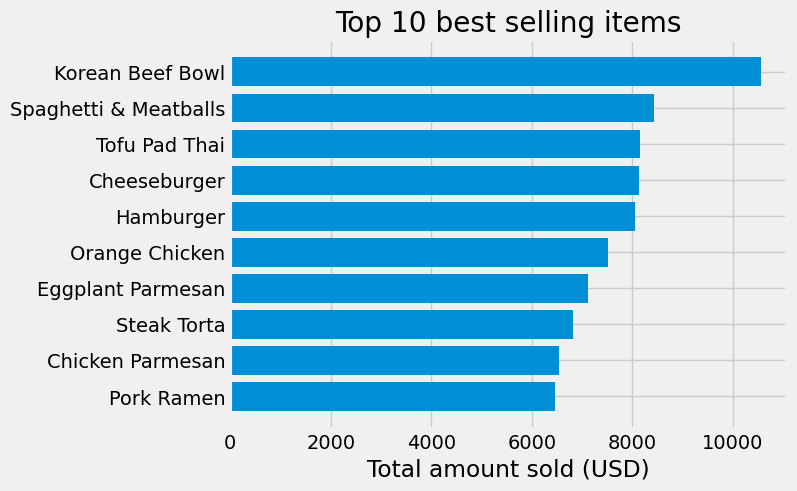

In [80]:
#top 10 best-selling items? VISUALIZATON

plt.style.use('fivethirtyeight')

top_10_best_selling_items=top_10_best_selling_items.reset_index()
top_10_best_selling_items

item_name=top_10_best_selling_items['item_name']
price=top_10_best_selling_items['price']

plt.barh(item_name, price)
plt.gca().invert_yaxis() #reorders the y-axis
plt.title('Top 10 best selling items')
plt.xlabel('Total amount sold (USD)')

plt.savefig(r'C:\Users\USER\Downloads\Restaurant DA\Top 10 best selling items.png', dpi=300)

In [81]:
#What are the least popular items?
items_by_popularity=restr_df.groupby('item_name')['order_details_id'].count()
ten_least_popular_items_by_order=items_by_popularity.nsmallest(10)
ten_least_popular_items_by_order

item_name
Chicken Tacos         123
Potstickers           205
Cheese Lasagna        207
Steak Tacos           214
Cheese Quesadillas    233
Chips & Guacamole     237
Veggie Burger         238
Shrimp Scampi         239
Fettuccine Alfredo    249
Hot Dog               257
Name: order_details_id, dtype: int64

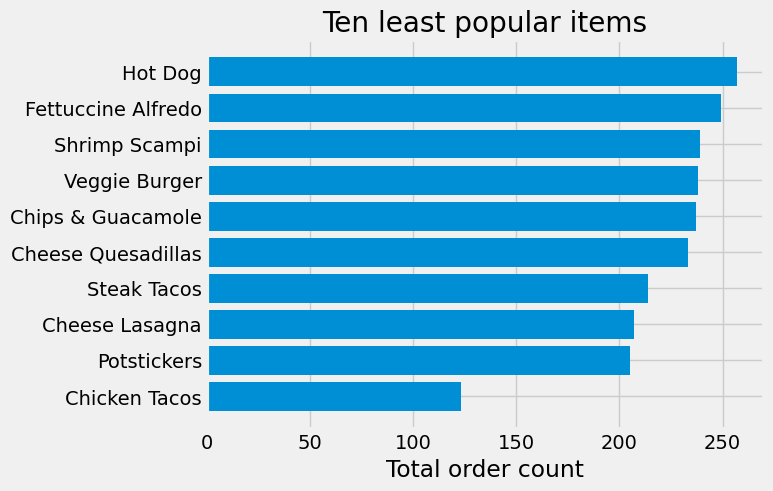

In [82]:
#What are the least popular items? VISUALIZATION

ten_least_popular_items_by_order=ten_least_popular_items_by_order.reset_index()
ten_least_popular_items_by_order

item_name=ten_least_popular_items_by_order['item_name']
order_count=ten_least_popular_items_by_order['order_details_id']

plt.barh(item_name, order_count)
plt.gca().invert_yaxis()
plt.title('Ten least popular items')
plt.xlabel('Total order count')

plt.gca().invert_yaxis()
plt.savefig(r'C:\Users\USER\Downloads\Restaurant DA\Ten least popular items.png', dpi=300)

In [ ]:
#Are there menu items that rarely get ordered and should be reconsidered? 
#The above products get ordered the laeast and should be reconsidered.

In [83]:
#Which category generates the highest revenue?
category_by_revenue=restr_df.groupby('category')['price'].sum()
category_by_revenue.sort_values()

category
American    28237.75
Mexican     34796.80
Asian       46720.65
Italian     49462.70
Name: price, dtype: float64

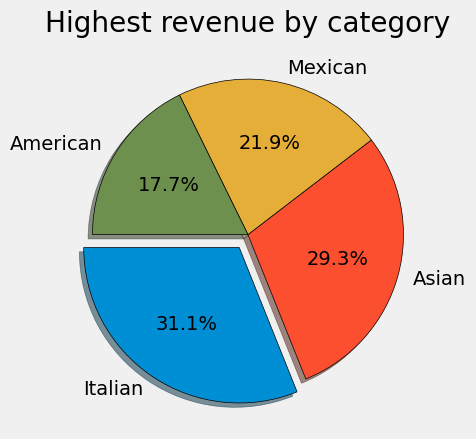

In [84]:
#Which category generates the highest revenue? VISUALIZATION
category_by_revenue=category_by_revenue.reset_index().sort_values('price', ascending=False)
category_by_revenue
labels=category_by_revenue['category']
slices=category_by_revenue['price']
explode=[0.1,0,0,0]
plt.pie(slices, labels=labels, explode=explode, shadow=True, 
        startangle=180, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.title('Highest revenue by category')
plt.savefig(r'C:\Users\USER\Downloads\Restaurant DA\Highest revenue by category.png', dpi=300)

In [ ]:
#What is the total revenue contribution of each menu category?
#the italian category is the highest grossing category followered by Asian, but American, least.

In [85]:
restr_df.columns

Index(['index', 'item_id', 'item_name', 'category', 'price',
       'order_details_id', 'order_id', 'order_date', 'order_time'],
      dtype='object')

In [86]:
#How do sales vary over time (daily, weekly, and monthly)?

#To resample and offset time series, first set 'order_date' column to index
restr_df.set_index('order_date', inplace=True)
#restr_df.reset_index()


In [87]:
#How do sales vary over time (daily)
daily_sales_trend=restr_df['price'].resample('D').sum()
daily_sales_trend=daily_sales_trend.reset_index()


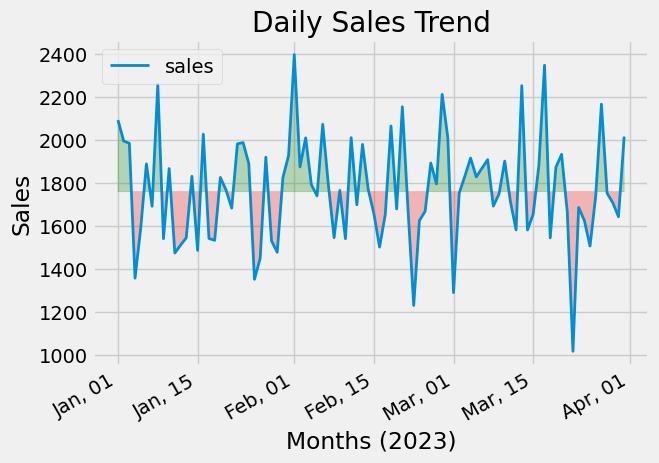

In [88]:
#How do sales vary over time (daily) VISUALIZATION
date=daily_sales_trend['order_date']
sales=daily_sales_trend['price']

plt.plot(date, sales, linewidth=2, label='sales')
plt.title('Daily Sales Trend')
plt.xlabel('Months (2023)')
plt.ylabel('Sales')
plt.legend()
plt.gcf().autofmt_xdate()
#plt.yscale('log')

#format dates on xaxis
date_formatter=mdates.DateFormatter('%b, %d') #only show M-D
plt.gca().xaxis.set_major_formatter(date_formatter)
#plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator()) #show only major dates
median=daily_sales_trend['price'].median()

plt.fill_between(date, sales, median, where=(sales>median), color='green',
                alpha=0.25, interpolate=True, label='Abv_Av')
plt.fill_between(date, sales, median, where=(sales<=median), color='red',
                alpha=0.25, interpolate=True, label='Below_Av')
plt.savefig(r'C:\Users\USER\Downloads\Restaurant DA\Daily Sales Trend.png', dpi=300)

In [89]:
#How do sales vary over time (weekly)
weekly_sales_trend=restr_df['price'].resample('W').sum()
weekly_sales_trend=weekly_sales_trend.reset_index()
date3=weekly_sales_trend['order_date']
price3=weekly_sales_trend['price']

weekly_sales_trend.nsmallest(2, 'price')

,order_date,price
0,2023-01-01,2091.6
13,2023-04-02,9282.8


In [90]:
#How do sales vary over time (monthly)
monthly_sales_trend=restr_df['price'].resample('ME').sum()

In [91]:
monthly_sales_trend=monthly_sales_trend.reset_index()

#set median
median=monthly_sales_trend['price'].median()

In [92]:
monthly_sales_trend

,order_date,price
0,2023-01-31,53816.95
1,2023-02-28,50790.35
2,2023-03-31,54610.60


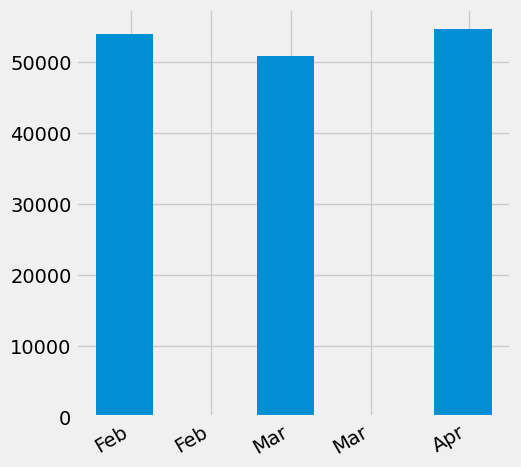

In [93]:
import matplotlib.dates as mdate

plt.figure(figsize=(5,6))
date2=monthly_sales_trend['order_date']
price2=monthly_sales_trend['price']

plt.bar(date2,price2, width=10)
plt.gcf().autofmt_xdate()

date_formatter=mdate.DateFormatter('%b')
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.gca().xaxis.set_major_locator(mdate.AutoDateLocator())

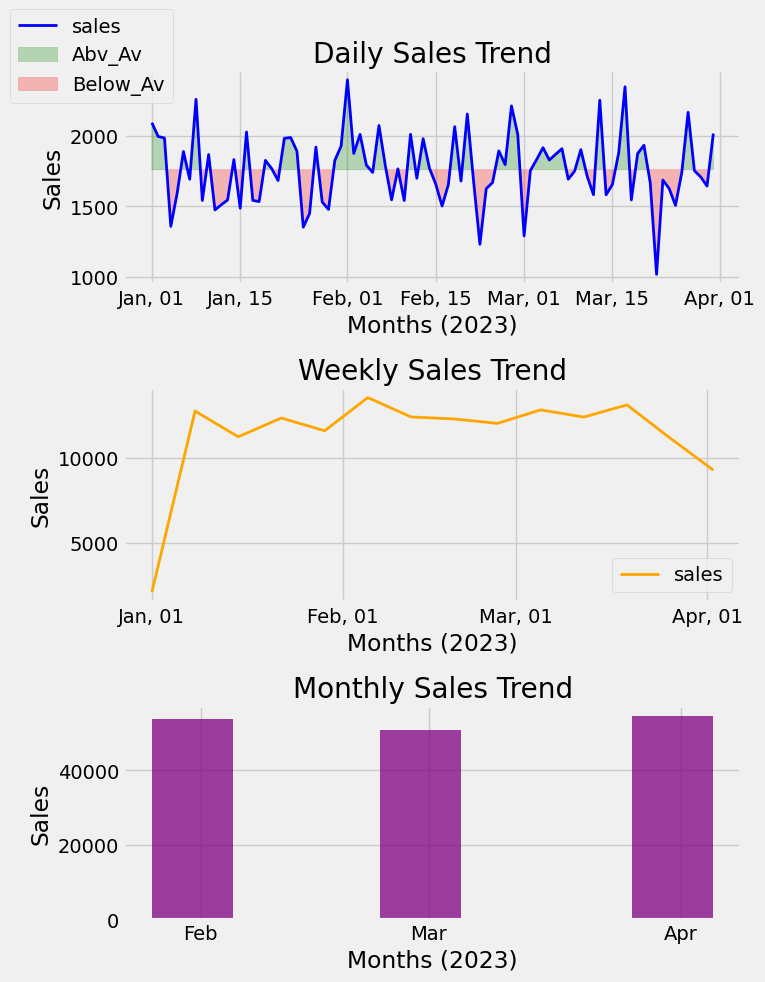

In [94]:
#How do sales vary over time (daily) VISUALIZATION
import matplotlib.dates as mdates

fig, (ax1,ax2, ax3)=plt.subplots(nrows=3, ncols=1, figsize=(8,10))

date=daily_sales_trend['order_date']
sales=daily_sales_trend['price']

ax1.plot(date, sales, linewidth=2, label='sales', color='blue')
ax1.set_title('Daily Sales Trend')
ax1.set_xlabel('Months (2023)')
ax1.set_ylabel('Sales')
ax1.legend()

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b, %d'))

median=daily_sales_trend['price'].median()
ax1.fill_between(date, sales, median, where=(sales>median), color='green',
                alpha=0.25, interpolate=True, label='Abv_Av')
ax1.fill_between(date, sales, median, where=(sales<=median), color='red',
                alpha=0.25, interpolate=True, label='Below_Av')
ax1.legend(loc='lower left', bbox_to_anchor=(-0.2, 0.8))

#weekly trend
weekly_sales_trend=restr_df['price'].resample('W').sum()
weekly_sales_trend=weekly_sales_trend.reset_index()
date3=weekly_sales_trend['order_date']
price3=weekly_sales_trend['price']

ax2.plot(date3, price3, linewidth=2, label='sales', color='orange')
ax2.set_title('Weekly Sales Trend')
ax2.set_xlabel('Months (2023)')
ax2.set_ylabel('Sales')
ax2.legend()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b, %d'))
ax2.xaxis.set_major_locator(mdates.MonthLocator())

#monthly trend
date2=monthly_sales_trend['order_date']
price2=monthly_sales_trend['price']

ax3.bar(date2,price2, width=10, color='purple', alpha=0.75)
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax3.set_title('Monthly Sales Trend')
ax3.set_xlabel('Months (2023)')
ax3.set_ylabel('Sales')

plt.tight_layout()
plt.savefig(r'C:\Users\USER\Downloads\Restaurant DA\Daily_Weekly_Monthly sales trend.png', dpi=300)


In [95]:
# the date with the highest and lowest daily sales were on Feb 1st and Mar. 22nd, respectively.
# the week with the highest and lowest sales were in 3rd week in Mar. and 1st week of Jan, respectively.
# the months with the highest and lowest monthly sales were Mar. and Feb. respectively.

In [96]:
#What are the peak ordering hours?

#first set index to 'order_time'
restr_df.set_index('order_time', inplace=True)

#resample by hours
ordering_hours=restr_df['order_id'].resample('h').count()
ordering_hours=ordering_hours.reset_index()

In [97]:
peak_ordering_hours=ordering_hours.nlargest(5, 'order_id')
peak_ordering_hours

#peak ordering hours were between 12 and 7pm

,order_time,order_id
2,1900-01-01 12:00:00,1659
3,1900-01-01 13:00:00,1558
7,1900-01-01 17:00:00,1355
8,1900-01-01 18:00:00,1290
9,1900-01-01 19:00:00,1074


In [98]:
restr_df.columns

Index(['index', 'item_id', 'item_name', 'category', 'price',
       'order_details_id', 'order_id'],
      dtype='object')

In [99]:
#What is the average order value? 
Average_order_value=restr_df['price'].mean()
Average_order_value

np.float64(13.16176738034223)

In [100]:
#How many unique items are sold per order on average? 
unique_items_per_order=restr_df.groupby('order_id')['item_id'].nunique()
Av_unique_items_per_order=unique_items_per_order.mean()
Av_unique_items_per_order

np.float64(2.2066254912970242)

In [101]:
restr_df['item_id'].nunique()

32

In [102]:
price_distribution=restr_df['price'].describe()
price_distribution

count    12097.000000
mean        13.161767
std          3.986392
min          5.000000
25%         10.500000
50%         13.950000
75%         16.500000
max         19.950000
Name: price, dtype: float64

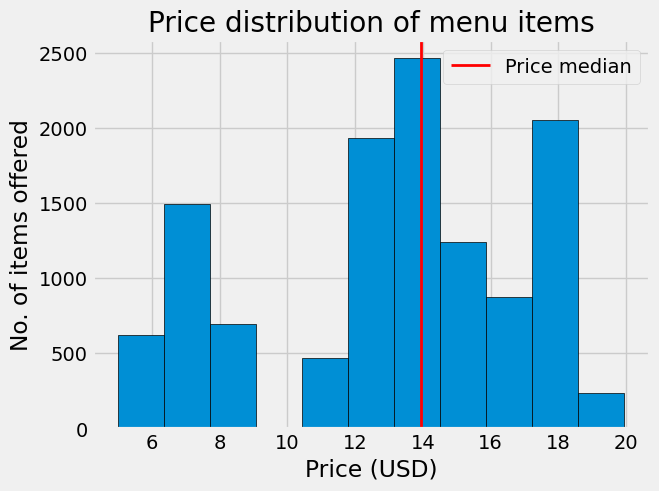

In [319]:
#How does the price distribution of menu items look?

plt.hist(restr_df['price'], bins=11, edgecolor='black')
median_price=restr_df['price'].median()
plt.axvline(median_price, color='red', linewidth=2, label='Price median')
plt.title('Price distribution of menu items')
plt.xlabel('Price (USD)')
plt.ylabel('No. of items offered')

plt.legend()
plt.savefig(r'C:\Users\USER\Downloads\Restaurant DA\price distribution of menu items.png', dpi=300)

In [104]:
# most items sold were at the median price of 14 USD
#the next highest items sold were just under the highest price of 19 USD 
#this means more customers did not mind paying for these product due to their appeal

In [105]:
#What is the relationship between item price and order frequency?
order_frequency=restr_df['item_id'].value_counts().reset_index()
order_frequency.columns=['item_id', 'order_count']

In [106]:
order_frequency.head()

,item_id,order_count
0,101,622
1,113,620
2,109,588
3,102,583
4,106,571


In [107]:
item_price=restr_df[['item_id', 'price']]

In [108]:
price_vs_count=pd.merge(order_frequency, item_price, on='item_id').drop_duplicates()
price_vs_count.tail()

,item_id,order_count,price
11115,121,233,10.50
11348,116,214,13.95
11562,128,207,15.50
11769,114,205,9.00
11974,115,123,11.95


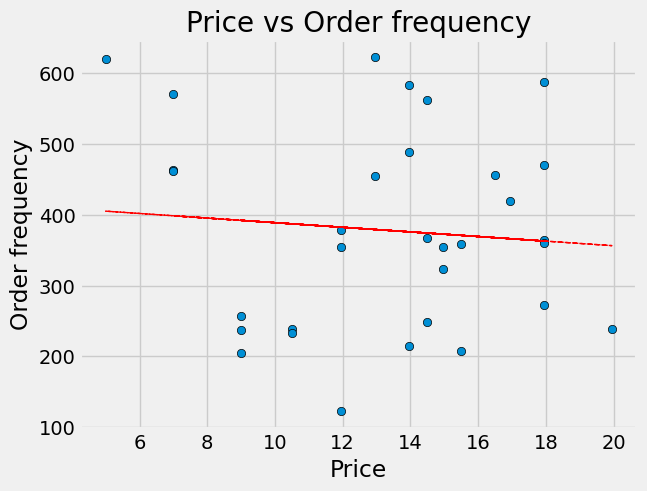

In [109]:
price_vs_count
price=price_vs_count['price']
order_freq=price_vs_count['order_count']
plt.scatter(price, order_freq, edgecolor='k')

plt.title('Price vs Order frequency')
plt.ylabel('Order frequency')
plt.xlabel('Price')

m, c=np.polyfit(price, order_freq, 1)
plt.plot(price, m*price + c, linestyle='--', linewidth=1, color='red')
plt.savefig(r'C:\Users\USER\Downloads\Restaurant DA\Price vs Order frequency correlation.png', dpi=300)

In [110]:
price.corr(order_freq)
# A correlaton value of -0.09010595054636052 suggests a very weak negative correlation between item price and order frequency.
# As price increases, the order frequency slightly decreases, but the effect is very weak.
# The relationship is not strong enough to conclude that price is the main driver of order frequency.

np.float64(-0.09010595054636052)

In [111]:
restr_df.reset_index(inplace=True)

In [112]:
restr_df=pd.read_csv(r'C:\Users\USER\Downloads\Restaurant DA/merged_restr_file.csv')
restr_df.tail()
#restr_df.drop(columns=['Unnamed: 0', 'week-month'], inplace=True)

,Unnamed: 0,item_id,item_name,category,price,order_details_id,order_id,order_date,order_time
12092,12092,132,Eggplant Parmesan,Italian,16.95,12120,5322,3/31/23,1:35:58 PM
12093,12093,132,Eggplant Parmesan,Italian,16.95,12126,5326,3/31/23,1:50:17 PM
12094,12094,132,Eggplant Parmesan,Italian,16.95,12149,5334,3/31/23,3:29:36 PM
12095,12095,132,Eggplant Parmesan,Italian,16.95,12169,5344,3/31/23,5:22:40 PM
12096,12096,132,Eggplant Parmesan,Italian,16.95,12194,5355,3/31/23,6:51:00 PM


In [113]:
#Which days of the week have the highest sales?

#first convert 'order_date' to datetime
restr_df['order_date']=pd.to_datetime(restr_df['order_date'], format='%m/%d/%y')
#create a new column with day names using dt.day_name()
restr_df['day_of_week']=restr_df['order_date'].dt.day_name()

C:\Users\USER\AppData\Local\Temp\ipykernel_4880\1125848221.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  week_day_sales=restr_df.groupby('day_of_week')['price'].sum().reset_index()


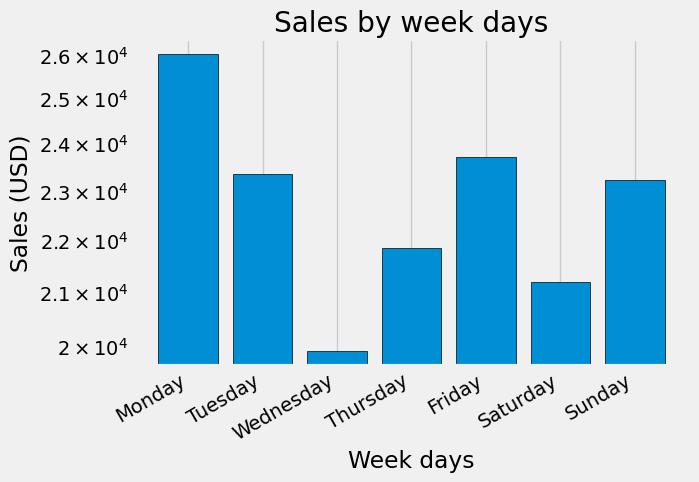

In [114]:
# Define the correct chronological order for weekdays
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert 'day_of_week' to a categorical type with the correct order
restr_df['day_of_week'] = pd.Categorical(restr_df['day_of_week'], categories=week_order, ordered=True)

week_day_sales=restr_df.groupby('day_of_week')['price'].sum().reset_index()
week_days=week_day_sales['day_of_week']
sales=week_day_sales['price']

plt.bar(week_days, sales, edgecolor='black')
plt.title('Sales by week days')
plt.ylabel('Sales (USD)')
plt.xlabel('Week days')

plt.gcf().autofmt_xdate()
plt.yscale('log')
plt.savefig(r'C:\Users\USER\Downloads\Restaurant DA\Sales by week days.png', dpi=300)

In [115]:
#the days of the week with the highest sales are Mondays and Fridays,
#while sales are lowest on Wednesdays

In [146]:
#How does item popularity vary by time of day
restr_df['order_time']=pd.to_datetime(restr_df['order_time'], format="%I:%M:%S %p")

In [147]:
restr_df['hour']=restr_df['order_time'].dt.hour

In [320]:
popularity_by_hour=restr_df.groupby(['hour', 'item_name'])['order_id'].nunique()
popularity_by_hour=popularity_by_hour.reset_index()
popularity_by_hour.sort_values(['hour', 'order_id'], ascending=(True, False))

,hour,item_name,order_id
0,10,California Roll,1
1,10,Cheeseburger,1
2,10,Hot Dog,1
3,10,Spaghetti & Meatballs,1
4,10,Veggie Burger,1
...,...,...,...
395,23,Mac & Cheese,1
396,23,Meat Lasagna,1
397,23,Orange Chicken,1
398,23,Spaghetti,1


In [321]:

most_popular_by_hour=popularity_by_hour.loc[popularity_by_hour.groupby('hour')['order_id'].idxmax()]
most_popular_by_hour

,hour,item_name,order_id
0,10,California Roll,1
21,11,Korean Beef Bowl,35
47,12,Edamame,83
99,13,Tofu Pad Thai,81
117,14,Korean Beef Bowl,54
147,15,Hamburger,51
195,16,Tofu Pad Thai,60
211,17,Hamburger,75
239,18,Edamame,67
271,19,Edamame,60


In [332]:
three_most_popular_by_hour = popularity_by_hour.groupby('hour').apply(lambda x: x.nlargest(3, 'order_id')).reset_index(drop=True)
three_most_popular_by_hour.head(10)

C:\Users\USER\AppData\Local\Temp\ipykernel_4880\3316169414.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  three_most_popular_by_hour = popularity_by_hour.groupby('hour').apply(lambda x: x.nlargest(3, 'order_id')).reset_index(drop=True)


,hour,item_name,order_id
0,10,California Roll,1
1,10,Cheeseburger,1
2,10,Hot Dog,1
3,11,Korean Beef Bowl,35
4,11,Tofu Pad Thai,34
5,11,Edamame,33
6,12,Edamame,83
7,12,Cheeseburger,78
8,12,Hamburger,78
9,13,Tofu Pad Thai,81


In [327]:
three_most_popular_by_hour.nlargest(3, 'order_id')

,hour,item_name,order_id
6,12,Edamame,83
9,13,Tofu Pad Thai,81
7,12,Cheeseburger,78


In [122]:
#Cheeseburger, Hot dog and Veggie Burger were the most ordered items in all the hours of the day
#and thier purchase time was 10am. 
#this suggest that customers are most likely to have these items for breakfast
#at this restaurant than any other meal.

In [123]:
#How often do customers order high-priced vs. low-priced items?
low_price_threshold=restr_df['price'].quantile(0.25)
high_price_threshold=restr_df['price'].quantile(0.75)

restr_df['price_category']=restr_df['price'].apply(lambda x: 'low' if x <= low_price_threshold 
else 'high' if x >= high_price_threshold else 'mid')

hourly_orders=restr_df.groupby(['hour', 'price_category'])['order_id'].count().reset_index()
hourly_pivot=hourly_orders.pivot(index='hour', columns='price_category', values='order_id')

In [124]:
hourly_pivot

price_category,high,low,mid
hour,,,
10,1,2,2
11,156,183,285
12,429,459,771
13,401,403,754
14,267,262,427
15,196,191,356
16,279,277,479
17,372,364,619
18,325,365,600


In [125]:
restr_df['price_category'].value_counts().reset_index()

,price_category,count
0,mid,5642
1,low,3285
2,high,3170


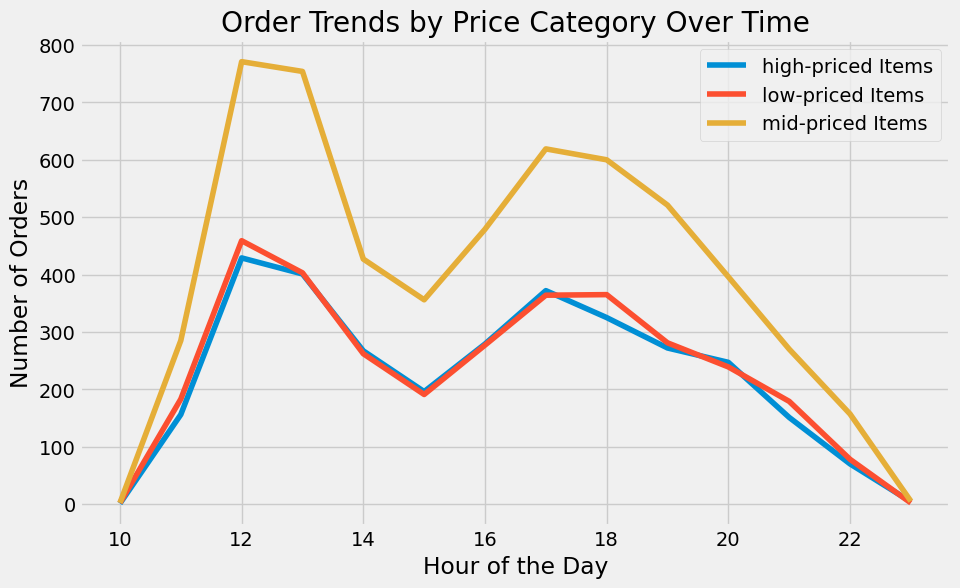

In [294]:
plt.figure(figsize=(10,6))
for category in hourly_pivot.columns:
    plt.plot(hourly_pivot.index, hourly_pivot[category], label=f"{category}-priced Items")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Order Trends by Price Category Over Time")
plt.legend()
plt.grid(True)
plt.savefig(r'C:\Users\USER\Downloads\Restaurant DA\Order Trends by Price Category Over Time.png', dpi=300)

In [127]:
#mid priced items are more likely to sell best between 12 noon and 5pm. 
#the trend is also similar for low and high priced items.
#it could be that customers of different financial capacities come 
#in around similar times of the day and make typical purchases.

In [128]:
# Do specific food categories sell better at certain times of the day?
hourly_order_by_category=restr_df.groupby(['hour', 'category'])['order_id'].count()
hourly_order_by_category=hourly_order_by_category.reset_index()
hourly_order_by_category.head()

,hour,category,order_id
0,10,American,3
1,10,Asian,1
2,10,Italian,1
3,11,American,140
4,11,Asian,196


In [129]:
hourly_category_pivot=hourly_order_by_category.pivot(index='hour', columns='category', values='order_id')
hourly_category_pivot

category,American,Asian,Italian,Mexican
hour,,,,
10,3.0,1.0,1.0,NaN
11,140.0,196.0,127.0,161.0
12,375.0,450.0,424.0,410.0
13,368.0,448.0,373.0,369.0
14,219.0,276.0,228.0,233.0
15,176.0,208.0,181.0,178.0
16,217.0,306.0,259.0,253.0
17,313.0,400.0,320.0,322.0
18,293.0,356.0,323.0,318.0


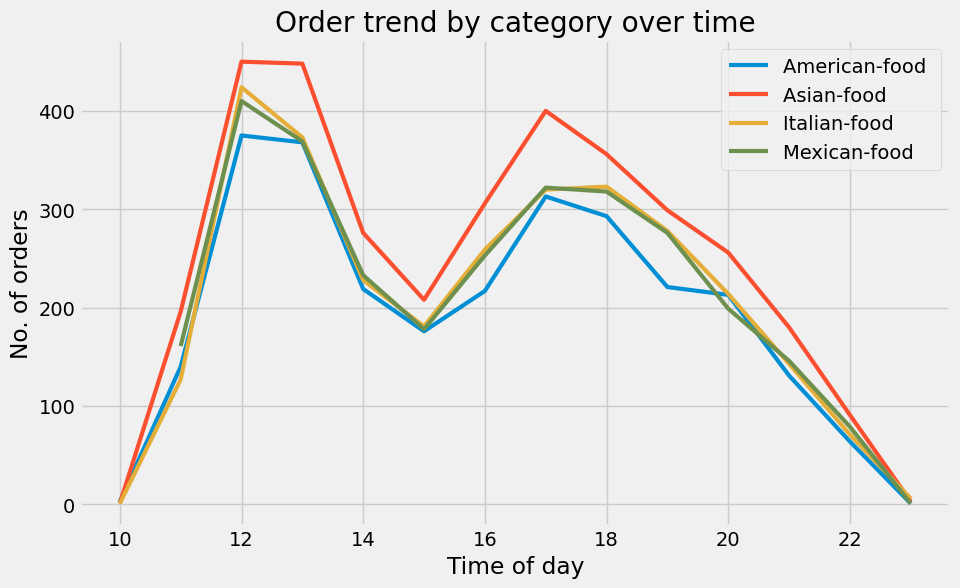

In [333]:
plt.figure(figsize=(10,6))
for category in hourly_category_pivot.columns:
    plt.plot(hourly_category_pivot.index, hourly_category_pivot[category], 
             label=f'{category}-food ', linewidth=3)

    plt.title('Order trend by category over time')
    plt.ylabel('No. of orders')
    plt.xlabel('Time of day')
    plt.legend()
    plt.savefig(r'C:\Users\USER\Downloads\Restaurant DA\Order trend by category over time.png', dpi=300)

In [131]:
#specific food categories do not sell differently from other food categories at different times of day.
#the trend follows the peak order times between 12-5pm with Asian food most ordered, all day 
#while American food is least ordered. Although
#the italian category is the highest grossing category in terms of revenue followered by Asian, but American, least.
#this could be as a result of Italian food being more highly priced than Asian food as confirmed below.

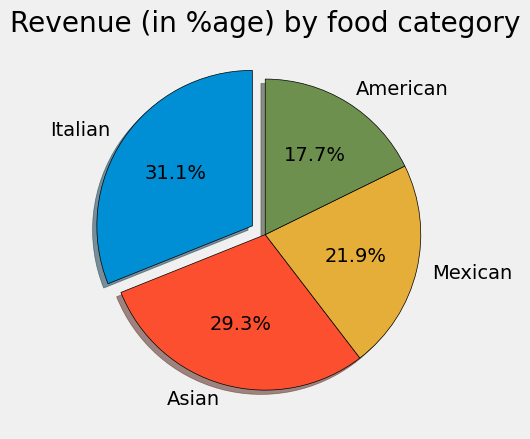

In [292]:
#What is the total revenue contribution of each menu category?
revenue_by_category=restr_df.groupby('category')['price'].sum().sort_values(ascending=False).reset_index()
revenue_by_category
slices=revenue_by_category['price']
labels=revenue_by_category['category']
explode=[0.1,0,0,0]

plt.pie(slices, labels=labels, shadow=True, startangle=90, wedgeprops={'edgecolor':'black'}, 
        explode=explode, autopct='%1.1f%%')
plt.title('Revenue (in %age) by food category')


In [ ]:
#Are there any patterns in order volume that could help optimize staffing?

C:\Users\USER\AppData\Local\Temp\ipykernel_4880\2854474876.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_order_trend = restr_df.groupby('day_of_week')['order_id'].nunique().reset_index()
C:\Users\USER\AppData\Local\Temp\ipykernel_4880\2854474876.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_order_trend = restr_df.groupby('month')['order_id'].nunique().reset_index()


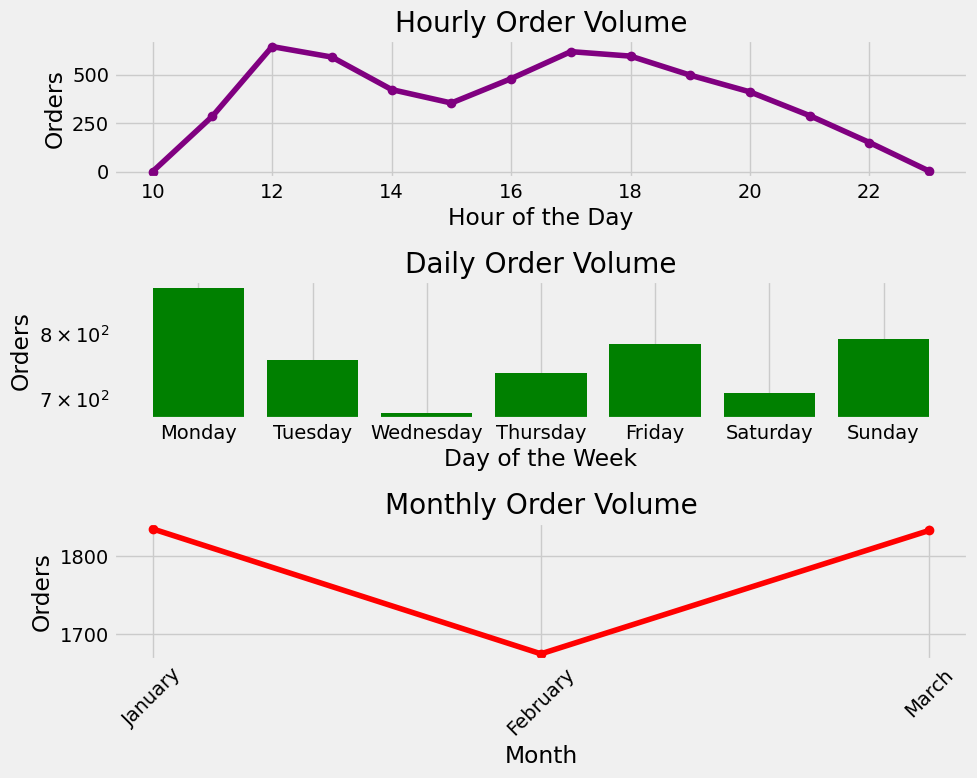

In [207]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' column is in datetime format
restr_df['order_date'] = pd.to_datetime(restr_df['order_date'])

# Extract hour from timestamp
# restr_df['hour'] = restr_df['order_date'].dt.hour
# restr_df['day_of_week'] = restr_df['order_date'].dt.day_name()
# restr_df['month'] = restr_df['order_date'].dt.month_name()

# Define correct order for weekdays & months
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Convert to categorical type for proper ordering
restr_df['day_of_week'] = pd.Categorical(restr_df['day_of_week'], categories=week_order, ordered=True)
restr_df['month'] = pd.Categorical(restr_df['month'], categories=month_order, ordered=True)

# Group data
hourly_order_trend = restr_df.groupby('hour')['order_id'].nunique().reset_index()
weekly_order_trend = restr_df.groupby('day_of_week')['order_id'].nunique().reset_index()
monthly_order_trend = restr_df.groupby('month')['order_id'].nunique().reset_index()

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

# Hourly Order Trend (Line Plot)
ax1.plot(hourly_order_trend['hour'], hourly_order_trend['order_id'], marker='o', color='purple')
ax1.set_title('Hourly Order Volume')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Orders')
#ax1.grid(True, linestyle="--", alpha=0.7)

# Daily Order Trend (Bar Chart)
ax2.bar(weekly_order_trend['day_of_week'], weekly_order_trend['order_id'], color='green')
ax2.set_title('Daily Order Volume')
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Orders')
ax2.set_yscale('log')
#ax2.grid(axis="y", linestyle="--", alpha=0.7)

# Monthly Order Trend (Line Plot)
filtered_monthly_order_trend=monthly_order_trend[monthly_order_trend['month'].isin(['January', 'February', 'March'])]
ax3.plot(filtered_monthly_order_trend['month'], filtered_monthly_order_trend['order_id'], marker='o', color='red')
ax3.set_title('Monthly Order Volume')
ax3.set_xlabel('Month')
ax3.set_ylabel('Orders')
#ax3.grid(True, linestyle="--", alpha=0.7)
ax3.set_xticks(filtered_monthly_order_trend['month'])
ax3.set_xticklabels(filtered_monthly_order_trend['month'], rotation=45)  # Rotate for readability

# Adjust layout
plt.tight_layout()

#plt.savefig(r'C:\Users\USER\Downloads\Restaurant DA\HDM patterns in order volume.png', dpi=300)


In [ ]:
# Hourly trend: Order volume peaks between 12 and 5 pm daily. More staff should be on duty during this period
# Weekly trend: Wednesdays, Saturdays and Thursdays have the lowest order volumes. 
# Mondays and Sundays have high order volumes and more staff is needed to cater to customers on these days
# Monthly trend: February had the least order volume while Jan. and Mar. had similar traffic. 

In [162]:
restr_df.head(1)

,Unnamed: 0,item_id,item_name,category,price,order_details_id,order_id,order_date,order_time,day_of_week,hour,price_category,month
0,0,101,Hamburger,American,12.95,11,6,2023-01-01,1900-01-01 12:29:36,Sunday,12,mid,January


In [205]:
#How many orders are placed per day, and what are the busiest hours?
number_of_orders_per_day_hour=restr_df.groupby(['day_of_week', 'hour'])['order_id'].nunique().reset_index()
number_of_orders_per_day_hour

C:\Users\USER\AppData\Local\Temp\ipykernel_4880\1897621578.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  number_of_orders_per_day_hour=restr_df.groupby(['day_of_week', 'hour'])['order_id'].nunique().reset_index()


,day_of_week,hour,order_id
0,Monday,10,0
1,Monday,11,45
2,Monday,12,108
3,Monday,13,100
4,Monday,14,49
...,...,...,...
93,Sunday,19,60
94,Sunday,20,55
95,Sunday,21,23
96,Sunday,22,12


In [230]:
number_of_orders_per_day_hour_pivot=number_of_orders_per_day_hour.pivot(index='day_of_week', columns='hour', values='order_id')
number_of_orders_per_day_hour_pivot
number_of_orders_per_day_hour_pivot.reset_index()
#number_of_orders_per_day_hour_pivot.set_index('day_of_week')

hour,day_of_week,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,Monday,0,45,108,100,49,49,62,100,92,93,76,67,40,0
1,Tuesday,0,24,55,53,60,54,75,78,94,92,82,60,29,3
2,Wednesday,0,34,53,57,66,53,80,85,78,68,54,35,17,0
3,Thursday,1,53,103,88,53,51,72,89,85,65,31,34,14,0
4,Friday,0,41,110,98,63,47,75,96,75,65,62,30,22,0
5,Saturday,1,47,110,79,57,38,56,76,82,54,51,40,17,0
6,Sunday,0,42,105,115,75,62,59,94,89,60,55,23,12,1


In [280]:
#How many order are placed per day
order_number_by_week_day=restr_df.groupby('day_of_week')['order_id'].nunique().sort_values(ascending=False).reset_index()
order_number_by_week_day

C:\Users\USER\AppData\Local\Temp\ipykernel_4880\692494392.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_number_by_week_day=restr_df.groupby('day_of_week')['order_id'].nunique().sort_values(ascending=False).reset_index()


,day_of_week,order_id
0,Monday,881
1,Sunday,792
2,Friday,784
3,Tuesday,759
4,Thursday,739
5,Saturday,708
6,Wednesday,680


In [236]:
order_number_by_week_day_vs_dayhour=pd.merge(number_of_orders_per_day_hour_pivot, order_number_by_week_day, on='day_of_week' )
order_number_by_week_day_vs_dayhour.rename(columns={'order_id':'total_order'}, inplace=True)
order_number_by_week_day_vs_dayhour.sort_values('total_order', ascending=False)

,day_of_week,10,11,12,13,14,15,16,17,18,19,20,21,22,23,total_order
0,Monday,0,45,108,100,49,49,62,100,92,93,76,67,40,0,881
6,Sunday,0,42,105,115,75,62,59,94,89,60,55,23,12,1,792
4,Friday,0,41,110,98,63,47,75,96,75,65,62,30,22,0,784
1,Tuesday,0,24,55,53,60,54,75,78,94,92,82,60,29,3,759
3,Thursday,1,53,103,88,53,51,72,89,85,65,31,34,14,0,739
5,Saturday,1,47,110,79,57,38,56,76,82,54,51,40,17,0,708
2,Wednesday,0,34,53,57,66,53,80,85,78,68,54,35,17,0,680


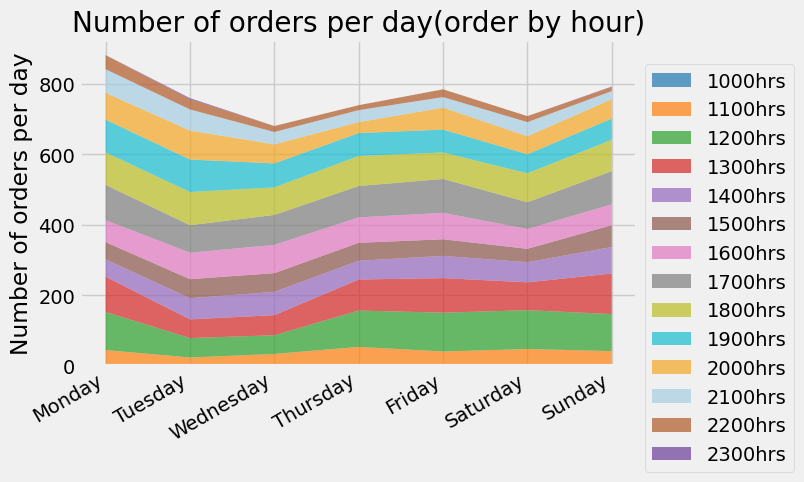

In [281]:
#busiest hours of each day
labels=['1000hrs', '1100hrs', '1200hrs', '1300hrs', '1400hrs', '1500hrs', '1600hrs', '1700hrs', 
        '1800hrs', '1900hrs', '2000hrs', '2100hrs', '2200hrs', '2300hrs']

week_days=order_number_by_week_day_vs_dayhour['day_of_week']

y_values = [order_number_by_week_day_vs_dayhour[hour] for hour in range(10, 24)]
colors = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#8C564B", 
    "#E377C2", "#7F7F7F", "#BCBD22", "#17BECF", "#F5A623", "#A6CEE3", 
    "#B15928", "#6A3D9A"]

plt.stackplot(week_days, y_values, labels=labels, colors=colors, alpha=0.7)
plt.gcf().autofmt_xdate()
plt.legend(loc='right', bbox_to_anchor=(1.3,0.3))
plt.grid(axis='both', linestyle='-', alpha=1)
plt.title('Number of orders per day(order by hour)')
plt.ylabel('Number of orders per day')
plt.savefig(r'C:\Users\USER\Downloads\Restaurant DA\Number of orders per day(order by hour).png', dpi=300)